# Esercitazione dataviz e gestione dati evento


In [2]:
#importazione librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, interpolate
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mplsoccer.pitch import Pitch, VerticalPitch
from mplsoccer import PyPizza, Radar
from highlight_text import fig_text
from adjustText import adjust_text
from database.read_db import *

                full_name
0      Fabio Quagliarella
1         Andrea Consigli
2           Miguel Veloso
3            Rui Patrício
4          Daniel Ciofani
..                    ...
310          Yayah Kallon
311  Federico Baschirotto
312        Jacopo Fazzini
313      Felix Afena-Gyan
314         Joan González

[315 rows x 1 columns]


# Esercizio 1: scatterplot

Crea una figura composta con diversi scatterplot che descrivano la prestazione dei giocatori su diversi aspetti, usando i dati combinati di Soccerment, SICS e Skillcorner.

In [5]:
df = read_db('ds.players_serieA_2022')

In [6]:
df = df[(df.mins_played >= 900)].fillna(0).set_index('player_id')
df

,full_name,birth_date,country,soccRole,team,cluster,games,mins_played,touches,xG,...,xGoT,xA,opxA,xOVA,xT,xT_from_passes,xT_from_carries,xT_from_passes_received,xg_blocked,xg_against_team
player_id,,,,,,,,,,,,,,,,,,,,,
18383,Samir Handanovic,1984-07-14,Slovenia,GK,Internazionale,0,14,1235,629,0.000000,...,0.000000,0.168089,0.165022,0.136835,0.515213,0.448159,0.067054,-0.309577,3.275600,13.5148
18500,Andrea Consigli,1987-01-27,Italy,GK,Sassuolo,0,35,3150,1558,0.000000,...,0.000000,0.208300,0.192392,0.136742,0.897659,0.829595,0.068064,-0.677697,8.646750,46.2042
19620,Miguel Veloso,1986-05-11,Portugal,CM,Verona,0,22,1167,748,0.763350,...,0.277284,1.946400,1.105440,1.366830,0.856443,0.752613,0.103830,-0.125454,0.214409,14.4235
33376,Guillermo Ochoa,1985-07-13,Mexico,GK,Salernitana,0,20,1800,864,0.000000,...,0.000000,0.115627,0.091044,0.066075,0.530677,0.512979,0.017698,-0.345814,10.280500,36.4787
38533,Rui Patrício,1988-02-15,Portugal,GK,Roma,0,35,3150,997,0.000000,...,0.000000,0.114017,0.097853,0.070803,0.522710,0.513960,0.008750,-0.358273,5.385790,27.4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523991,Isak Hien,1999-01-13,Sweden,CB,Verona,0,32,2607,1417,0.251607,...,0.000000,0.274244,0.259304,0.218966,1.289710,0.868972,0.420739,-0.420675,0.886218,41.0776
543612,Federico Gatti,1998-06-24,Italy,CB,Juventus,0,18,1446,1146,0.623434,...,0.209261,1.162980,1.160900,0.735891,1.362100,1.204480,0.157618,-0.548807,1.150440,17.0280
546101,Federico Baschirotto,1996-09-20,Italy,CB,Lecce,0,37,3330,1850,2.070470,...,2.409990,1.041050,1.029830,0.939792,1.809620,1.585980,0.223634,-0.190879,2.330040,42.1248


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 18383 to 559928
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_name                337 non-null    object 
 1   birth_date               337 non-null    object 
 2   country                  337 non-null    object 
 3   soccRole                 337 non-null    object 
 4   team                     337 non-null    object 
 5   cluster                  337 non-null    int64  
 6   games                    337 non-null    int64  
 7   mins_played              337 non-null    int64  
 8   touches                  337 non-null    int64  
 9   xG                       337 non-null    float64
 10  npxG                     337 non-null    float64
 11  opxG                     337 non-null    float64
 12  goals                    337 non-null    int64  
 13  npgoals                  337 non-null    int64  
 14  opgoals                 

In [8]:
for c in df.select_dtypes(np.number).columns.to_list():
    if (c.endswith('_p90') == False) and ('%' not in c):
        df[f'{c}_p90'] = df[c] / df.mins_played * 90 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 18383 to 559928
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_name                    337 non-null    object 
 1   birth_date                   337 non-null    object 
 2   country                      337 non-null    object 
 3   soccRole                     337 non-null    object 
 4   team                         337 non-null    object 
 5   cluster                      337 non-null    int64  
 6   games                        337 non-null    int64  
 7   mins_played                  337 non-null    int64  
 8   touches                      337 non-null    int64  
 9   xG                           337 non-null    float64
 10  npxG                         337 non-null    float64
 11  opxG                         337 non-null    float64
 12  goals                        337 non-null    int64  
 13  npgoals           

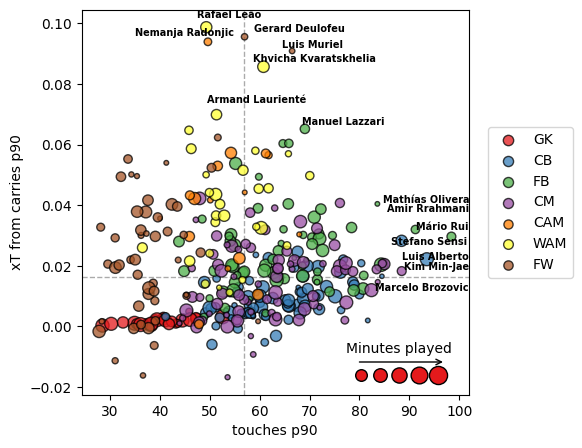

In [13]:
#selezione variabili
xvar = 'touches_p90'
yvar = 'xT_from_carries_p90'

#definizione degli outlier da annotare con il nome
df['outlier_x'] = df[xvar] >= df[xvar].quantile(0.98)
df['outlier_y'] = df[yvar] >= df[yvar].quantile(0.98)
df['outlier'] = df.outlier_x | df.outlier_y

#definizione ruoli e colori
soccRoles = ['GK', 'CB', 'FB', 'CM', 'CAM', 'WAM', 'FW']
palette = sns.color_palette('Set1', n_colors = len(soccRoles))

#rescaling dei minuti per la dimensione dei punti
scaler = MinMaxScaler((10,100))
df['marker_size'] = scaler.fit_transform(df.mins_played.values.reshape(-1,1)).flatten()

#inizializzazione figura e asse
f, ax = plt.subplots(figsize = (5,5))

#scatter plot per ruolo con annotazione per outlier
annotations = []
for sr,color in zip(soccRoles,palette):
    dfsr = df[df.soccRole == sr]
    ax.scatter(dfsr[xvar], dfsr[yvar], color = color, s = dfsr.marker_size, label = sr, alpha = 0.75, edgecolor = 'black', zorder = 10)
    for i,r in dfsr[dfsr.outlier].iterrows():
        ann = ax.annotate(r.full_name, xy = (r[xvar], r[yvar]), fontsize = 7, weight = 'bold', ha = 'center', va = 'center', zorder = 11)
        annotations.append(ann)

#linee mediane
ax.axhline(df[yvar].median(), ls = '--', color = 'black', lw = 1, alpha = 0.33, zorder = 1)
ax.axvline(df[xvar].median(), ls = '--', color = 'black', lw = 1, alpha = 0.33, zorder = 1)

#riposizionamento automatico annotazioni evitando gli altri punti
adjust_text(annotations, df[xvar].values, df[yvar].values)

#legenda dimensione punti in base ai minuti
xstart = 0.72
ystart = 0.05
xstep = 0.05
xend = xstart+xstep*4
ystep = 0.035
for j in range(0,5):
    ax.scatter(xstart+xstep*j, ystart, c = palette[0], ec = 'black', s = 70+j*25, clip_on = False, transform = ax.transAxes)
ax.annotate("", xytext=(xstart-0.01, ystart+ystep), xy=(xend+0.02, ystart+ystep), xycoords = 'axes fraction', arrowprops=dict(arrowstyle="->", color = 'black'))
ax.annotate(f'Minutes played', ((xstart+xend)/2., ystart+2*ystep), xycoords = 'axes fraction', ha = 'center', va = 'center')

#label assi e legenda
ax.set_xlabel('touches p90')
ax.set_ylabel('xT from carries p90')
leg = ax.legend(bbox_to_anchor = (1.05,0.5), loc = 'center left', borderaxespad = 0)
# plt.show()
plt.savefig('scatter_example.png', bbox_inches = 'tight')

# Esercizio 2: grafici a barre

Raggruppa i dati dei giocatori per ruolo e mostra i ranking risultanti tramite grafici a barre per statistiche relative a diverse fasi di gioco.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 18383 to 559928
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_name                    337 non-null    object 
 1   birth_date                   337 non-null    object 
 2   country                      337 non-null    object 
 3   soccRole                     337 non-null    object 
 4   team                         337 non-null    object 
 5   cluster                      337 non-null    int64  
 6   games                        337 non-null    int64  
 7   mins_played                  337 non-null    int64  
 8   touches                      337 non-null    int64  
 9   xG                           337 non-null    float64
 10  npxG                         337 non-null    float64
 11  opxG                         337 non-null    float64
 12  goals                        337 non-null    int64  
 13  npgoals           

In [29]:
role = df.groupby(['soccRole']).mean(['touches_p90'])['touches_p90']

In [36]:
role = role.sort_values(ascending=False)

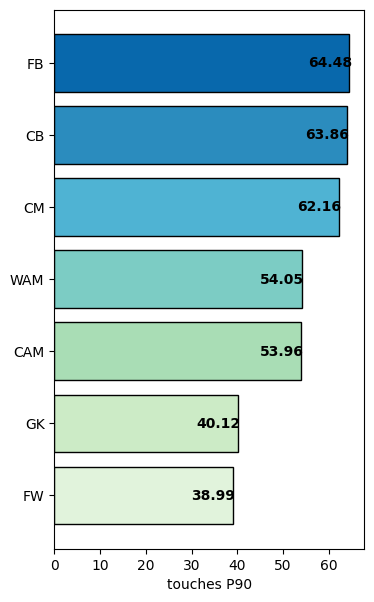

In [37]:
#inizializzazione figura e asse
f, ax = plt.subplots(figsize = (4,7))

#creazione barre orizzontali: nome full_name su y, passaggi chiave p90 su x, scala di colore verde-blu
bars = ax.barh(y = role.index, width = role.values, color = sns.color_palette('GnBu_r', n_colors = len(role.index)), ec = 'black')

#annotazione valori sopra le barre
ax.bar_label(bars, fmt = '%.2f', padding = -30, weight = 'bold')

#label assi
ax.set_xlabel('touches P90')

#inversione asse Y per ordine discendente
ax.invert_yaxis()
plt.show()

# Esercizio 3: pizza charts

Crea un pizza chart utilizzando i dati di squadra, confrontando due squadre su un set di metriche appropriato.

In [3]:
df = read_db('ds.team_stats')

In [8]:
metriche = ['npxG', 'npxG_per_shot', 'xG_from_counters', 'x_points', 'opxA', 'opxG', 'xT_from_passes', 'xT_from_carries']
metriche_rank = [f'{m}_rank' for m in metriche]

df[metriche_rank] = (100 * df[metriche].rank(pct = True)).astype(int)

In [13]:
df[df['team_id'] == 127][metriche_rank]

,npxG_rank,npxG_per_shot_rank,xG_from_counters_rank,x_points_rank,opxA_rank,opxG_rank,xT_from_passes_rank,xT_from_carries_rank
5,100,85,90,95,100,100,100,70


In [15]:
# parameter list

values = df[df['team_id'] == 127][metriche_rank].values    # for Inter
values_2 = df[df['team_id'] == 128][metriche_rank].values  # for Juventus

# instantiate PyPizza class
baker = PyPizza(
    params=[x.replace('_', ' ') for x in metriche],                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#222222",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    last_circle_color="#222222",    # color of last circle
    other_circle_ls="-.",           # linestyle for other circles
    other_circle_lw=1               # linewidth for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # comparison values
    figsize=(7,7),             # adjust figsize according to your need
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#222222",
        zorder=2, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#FF9300", edgecolor="#222222",
        zorder=2, linewidth=1,
    ),
    kwargs_params=dict(
        color="#000000", fontsize=12, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                          # values to be used when adding parameter-values labels
    kwargs_compare_values=dict(
        color="#000000", fontsize=12, zorder=3,
        bbox=dict(edgecolor="#000000", facecolor="#FF9300", boxstyle="round,pad=0.2", lw=1)
    ),                          # values to be used when adding parameter-values labels
)

# add title
fig_text(
    0.5, 0.99, "<Inter> vs <Juventus>", size=17, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#EE8900'}],
    ha="center", color="#000000", weight = 'extra bold'
)
plt.show()

Exception: Length of params and values are not equal!!!

# Esercizio 4: heatmap eventi difensivi

Usando i dati evento, crea una heatmap che mostri la distribuzione degli eventi difensivi per una squadra a scelta.

In [17]:
df = read_db('ds.team_player_events')

In [ ]:
df['defensive'] = df[['direct_free_kick', 'penalty', 'from_corner', 'set_piece', 'free_kick', 'corner', 'throw_in', 'goal_kick', 'kick_off']].sum(axis=1) == 0
dfip = df[(df.type_id == 1) & (df.team_id == 127) & (df.game_id == df[df.team_id == 127].game_id.unique()[-1]) & (df.open_play == True)]


pitch = Pitch(pitch_type = 'opta', line_zorder = 100)

f, ax = pitch.draw(figsize=(7,7))
bin_statistic = pitch.bin_statistic(dfip.x, dfip.y, statistic='count', bins=(50,50))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 3)
pcm = pitch.heatmap(bin_statistic, cmap='Blues', ax=ax)
pitch.scatter(x = dfip.x,
             y = dfip.y,
             s = 10,
             color = 'black',
             zorder = 10,
             alpha = 0.1,
             ax = ax)
cbar = plt.colorbar(pcm, shrink = 0.5, pad = 0.01, ax = ax)
#in questo caso il valore numerico in ogni bin non è particolarmente informativo perché è "spalmato" dal filtro Gaussiano, quindi possiamo rimuoverlo dalla colorbar per non creare confusione
cbar.set_ticks([])
plt.show()

# Esercizio 5: heatmap ingressi in area subiti

Usando i dati evento, crea una heatmap che mostri le zone da cui l'avversario ha effettuato passaggi riusciti nell'area offensiva. Suggerimento: usa la colonna `opp_team_id` per individuare l'avversario e isolare gli eventi subiti.

# Esercizio 6: calcolo di metriche dai dati evento 1

Calcola il numero di cross giocati da prima (early cross) e dopo (late cross) l'altezza dell'inizio dell'area di rigore, aggregando a livello di squadra. Mostra la distribuzione % dei due tipi di cross sul totale usando uno stacked bar chart.

# Esercizio 6: calcolo di metriche dai dati evento 2

Calcola per ogni giocatore con almeno 10 tiri (esclusi rigori e autogol) la distanza media del tiro dal centro della porta avversaria e la % di realizzazione. Crea uno scatterplot mettendo in relazione le due variabili.